In [ ]:
# K Means Customer segmentation

In [19]:
# Importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [20]:
## Reading the data 
customers = pd.read_csv('Mall_Customers.csv')
customers_variables = customers.drop(['CustomerID', 'Gender', 'Age'], axis=1)

In [21]:
customers_variables.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [25]:
customers_variables.shape

(200, 2)

In [22]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [27]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [29]:
## Normalise the data if needed

# customers_norm = (customers_variables - customers_variables.min()) / (customers_variables.max() - customers_variables.min())

customers_norm = customers_variables

# print(customers_norm.describe())
# print(customers_norm)

Text(0.5, 1.0, 'Spending Score (1-100) vs Annual Income (k$)')

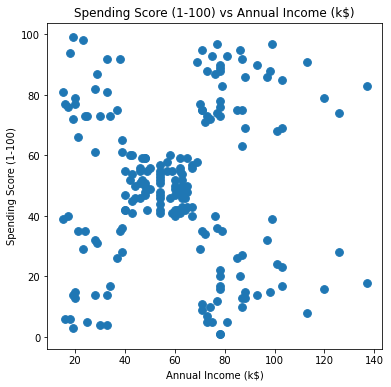

In [32]:
plt.figure(figsize=(6, 6))
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)',  data=customers_norm, s=60)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')

C:\Users\AdmiN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

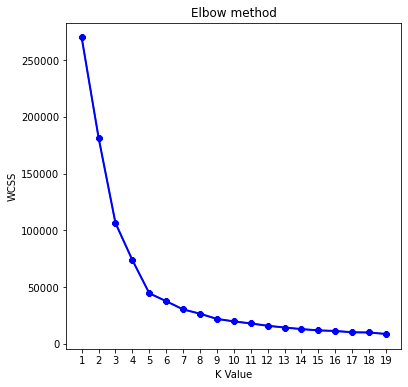

In [33]:
## Selecting ideal value of K using elbow method 

wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(customers_norm)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(range(1, 20), wcss)
plt.title("Elbow method")
plt.plot(range(1,20),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,20,1))
plt.ylabel("WCSS")

In [34]:
clustering = KMeans(n_clusters=5, max_iter=300)
clustering.fit(customers_norm)

KMeans(n_clusters=5)

In [43]:
km1 = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, random_state=None, tol=0.0001, verbose=1)

In [45]:
km1.fit(customers_norm)
y = km1.predict(customers_norm)

Initialization complete
Iteration 0, inertia 93876.0
Iteration 1, inertia 69286.63869547688
Iteration 2, inertia 67553.82928716636
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 87826.0
Iteration 1, inertia 67984.5696619022
Iteration 2, inertia 67553.82928716636
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 92414.0
Iteration 1, inertia 68448.73993747018
Iteration 2, inertia 67780.01492799811
Iteration 3, inertia 67754.68521014997
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 83259.0
Iteration 1, inertia 46385.42531890173
Iteration 2, inertia 44532.84706230876
Iteration 3, inertia 44472.33192121094
Iteration 4, inertia 44448.45544793371
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 96434.0
Iteration 1, inertia 75226.11339096016
Iteration 2, inertia 70537.84739032743
Iteration 3, inertia 70169.2579129409
Iterati

In [46]:
customers_norm["label"] = y
customers["label"] = y

In [ ]:
#print(customers)

Text(0.5, 1.0, 'Spending Score (1-100) vs Annual Income (k$)')

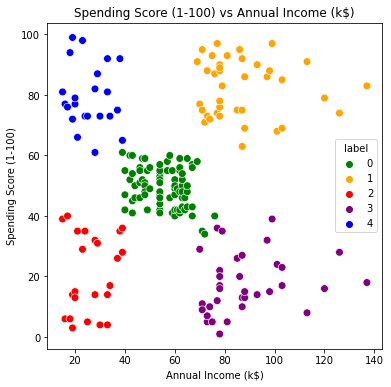

In [47]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue="label",
                palette=['green', 'orange', 'red', 'purple', 'blue'], legend='full',
                data=customers_norm, s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')

In [48]:
#customers.to_csv('customer_segmentation.csv')